In [1]:
import torch
# import cv2
import math
# import Exception
from matplotlib import pyplot as plt

/scratch/as14229/envs_dirs/GAN/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
data_dir = "/home/as14229/Shared/SuperGAN/data/fsgan_test/"
image_dict = torch.load(data_dir+"fsgan_image_stages.pth", map_location=torch.device('cpu'))

In [16]:
# image = unnormalize(image_dict['r1'])
image = image_dict['inpainting'].detach().copy()

image *=0.5
image +=0.5
plt.imshow(image.permute(1, 2, 0))

AttributeError: 'Tensor' object has no attribute 'copy'

r_bg_mask result type Float can't be cast to the desired output type Bool


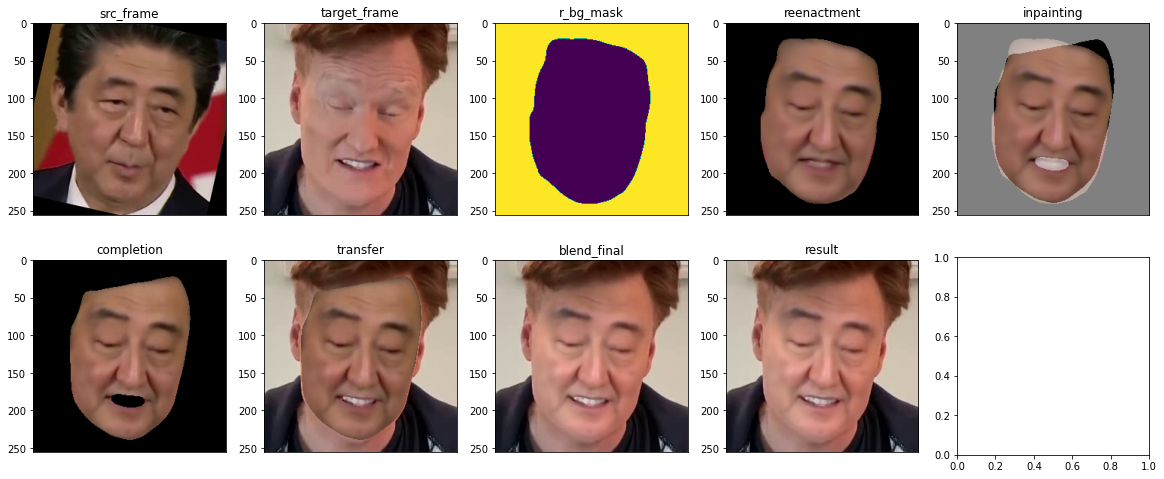

In [15]:
imlen = len(image_dict.keys())

fig, ax = plt.subplots(2,math.ceil(imlen/2), figsize=(20, 8))
ax = ax.ravel()

for i, (stage,image) in enumerate(image_dict.items()):
    image_tensor = image.detach().clone()
    ax[i].set_title(stage)
    ax[i].set_xticks([])

    try:
        image_tensor *= 0.5
        image_tensor += 0.5
    except Exception as e:
        print(stage,e)
        
    ax[i].imshow(image_tensor.permute(1, 2, 0));
    
plt.show()